# Simon Segmentation Test

## 0. Import

In [1]:
%matplotlib notebook

import cv2
import skimage.measure
from matplotlib import pyplot as plt
from rhizoscan import get_data_path

## 1. Segmentation

Adaptive threshold explanation :

https://docs.opencv.org/3.4.0/d7/d4d/tutorial_py_thresholding.html
https://docs.opencv.org/3.0-beta/modules/imgproc/doc/miscellaneous_transformations.html?highlight=adaptivethreshold#cv2.adaptiveThreshold


<IPython.core.display.Javascript object>


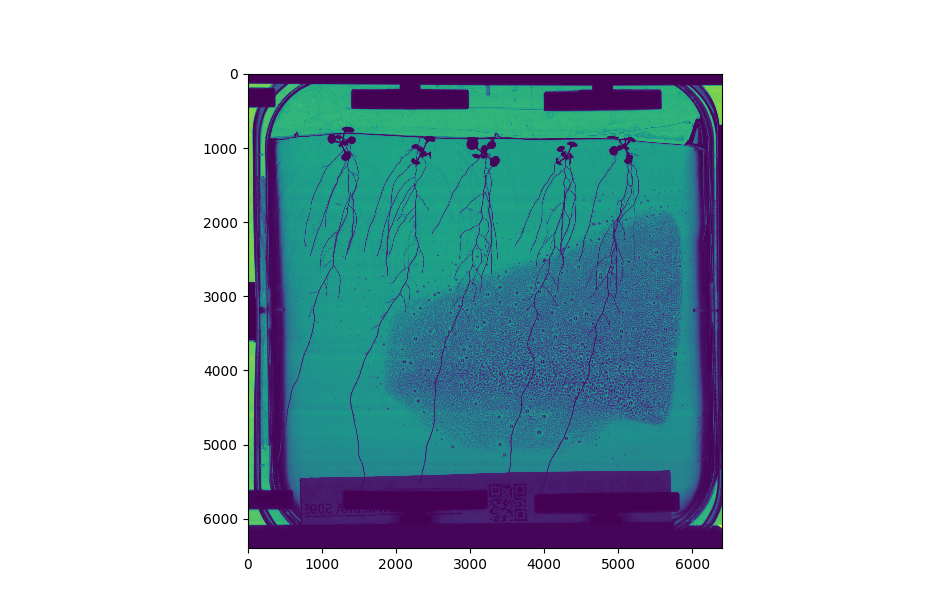

In [14]:
# ==============================================================================
# LOAD (available image : small_root, medium_root, big_root)
filename = "big_root"
image_filename = get_data_path('pipeline/{}.jpg'.format(filename))
image = cv2.imread(image_filename, cv2.IMREAD_GRAYSCALE)
plt.imshow(image)

<IPython.core.display.Javascript object>


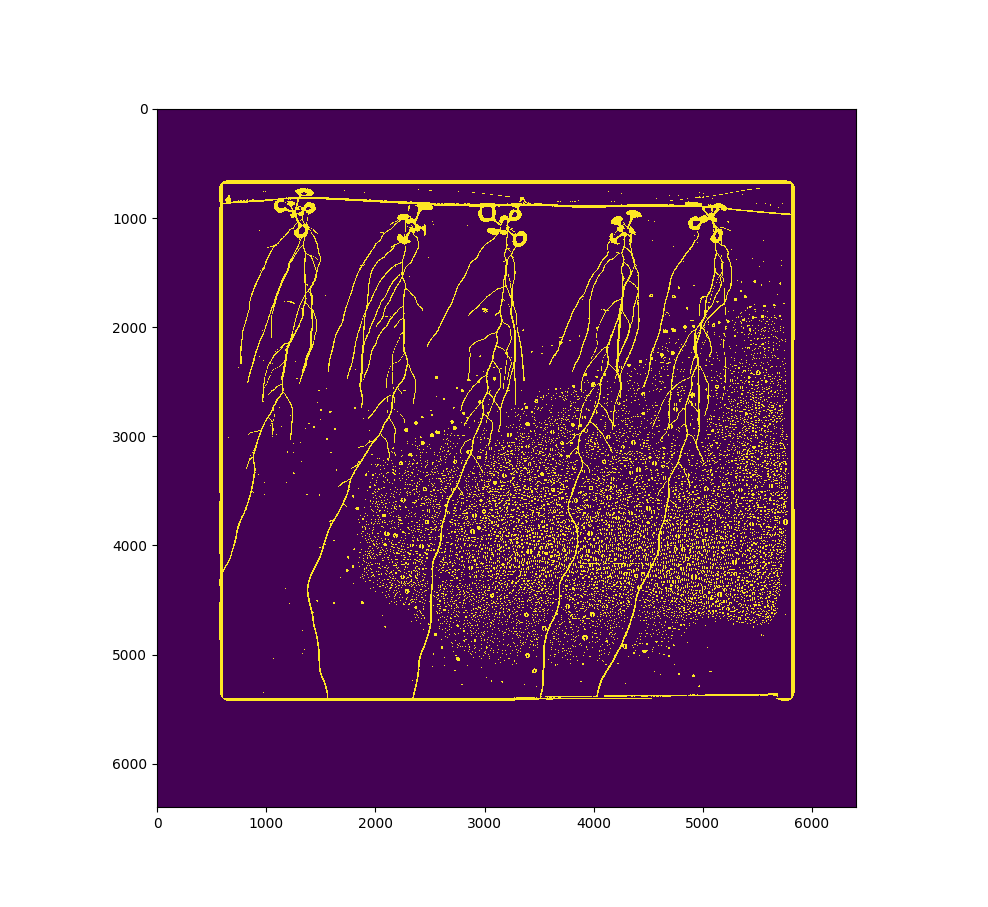

In [15]:
# ==============================================================================
# RESIZE

# cv2_image = cv2.resize(cv2_image, (3200, 3200))

# ==============================================================================
# "CROP" IMAGE

# If you crop the image : 
# image = image[700:5300, 600:5800]

image[5400:, :] = 0
image[:700, :] = 0
image[:, :600] = 0
image[:, 5800:] = 0

# ===================================================================================
# FILTER

# cv2_image = cv2.GaussianBlur(cv2_image,(15,15), 5)
for i in range(5):
    image = cv2.morphologyEx(image, cv2.MORPH_CLOSE, (25, 25))

# ==============================================================================
# SEGMENTATION - THRESHOLDING
# cv2.adaptiveThreshold(src, maxValue, adaptiveMethod, thresholdType, blockSize, C[, dst]) → dst
bin_image = cv2.adaptiveThreshold(image,
                                  255, 
                                  cv2.ADAPTIVE_THRESH_MEAN_C, 
                                  cv2.THRESH_BINARY_INV, 
                                  101, #101
                                  25) # 25
plt.imshow(bin_image)

<IPython.core.display.Javascript object>


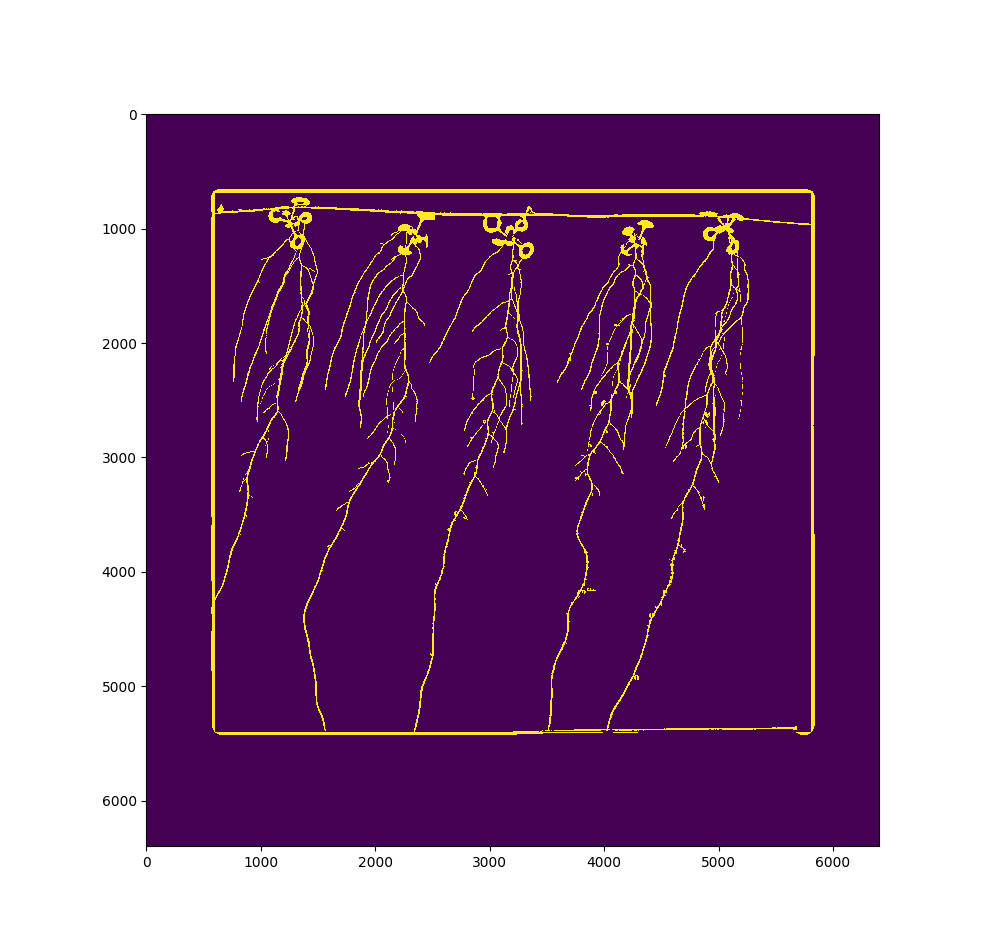

In [16]:
# ==============================================================================
# KEPT BIGGEST CONNECTED COMPONENT

# Problems with the opencv oldest version
# ret, labels = cv2.connectedComponents(img)

label_image  = skimage.measure.label(bin_image)
regions = skimage.measure.regionprops(label_image)

# Certainly the best methods is to kept the area superior to a x definate value.
region = max(regions, key=lambda x: x.area)

im_seg = label_image.copy()
im_seg[im_seg != region.label] = 0
im_seg[im_seg > 0] = 255

# ==============================================================================
# SAVE AND DISPLAY 

cv2.imwrite("{}_{}.png".format(filename, "simon_test"), im_seg)
plt.imshow(im_seg)

## 3. idea to continue :

### 1. Crop image :

With a little more large dimension : (like image[700:5300, 600:5800])

WARING : 4th root plant (from the left) is connected by the low box

### 2. Detect the line between the leaf  : 

Look kmean color reduction from the raw image : http://scikit-learn.org/stable/auto_examples/cluster/plot_color_quantization.html

### 3. Not kept the biggest connected component but the connected components with a area superior to X (to define)
